# **Os gastos dos Senadores no Brasil**

Nesse projeto, será feito uma análise dos gastos dos Senadores do Brasil utilizando os dados das **Cotas para Exercício da Atividade Parlamentar dos Senadores (CEAPS)** (Disponível em: [CEAPS](https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps)). Resumidamente, as Cotas para Exercício da Atividade Parlamentar dos Senadores (CEAPS) são uma verba para ressarcimento de despesas dos Senadores, cujo valor total muda de acordo com o Estado de origem do senador. A CEAPS é a soma da verba indenizatória, no valor de R$ 15 mil, mais o valor de cinco trechos aéreos entre Brasília (DF) e a capital do Estado de origem do senador (Para mais informações: [clique aqui](http://politicos.org.br/blog/saiba-tudo-sobre-a-cota-parlamentar)).

___
**Antes de iniciar a análise, um aviso:**
> A análise não será focada em quem são os Senadores ou em Partidos Políticos para evitar discussões políticas ou ideológicas. O foco principal será as despesas dos Senadores.
>
> No entanto, quem se interessar em saber o nome dos Senadores e suas respectivas despesas, essa informação está disponível no conjunto de dados das [CEAPS](https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps).
___

## **Obtenção dos Dados**
Os dados foram obtidos diretamente no Portal Transparência (seção *Dados Abertos*) do [site do Senado Federal](https://www12.senado.leg.br/dados-abertos).

Os conjuntos de dados disponibilizados são referentes aos anos de 2008 a 2019.

### **Importando os dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

df_2019 = pd.read_csv("2019.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")
df_2018 = pd.read_csv("2018.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")
df_2017 = pd.read_csv("2017.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")
df_2016 = pd.read_csv("2016.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")
df_2015 = pd.read_csv("2015.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")
df_2014 = pd.read_csv("2014.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")
df_2013 = pd.read_csv("2013.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")
df_2012 = pd.read_csv("2012.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")
df_2011 = pd.read_csv("2011.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")
df_2010 = pd.read_csv("2010.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")
df_2009 = pd.read_csv("2009.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")
df_2008 = pd.read_csv("2008.csv", sep = ";", encoding = "latin-1", header=1, decimal=",")

## **Análise dos dados**
Nesta análise, o foco será o ano de 2019 e, no final, será feito um comparativo dos gastos por ano.

In [2]:
# Tamanho do conjunto de dados
print("Linhas:", df_2019.shape[0])
print("Colunas:", df_2019.shape[1])

Linhas: 21615
Colunas: 10


In [3]:
# Verificando os nomes das colunas
df_2019.columns

Index(['ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR',
       'DOCUMENTO', 'DATA', 'DETALHAMENTO', 'VALOR_REEMBOLSADO'],
      dtype='object')

In [4]:
# Verificando os tipos dos atributos
df_2019.dtypes

ANO                    int64
MES                    int64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO    float64
dtype: object

In [5]:
# Verificando as 5 primeiras entradas do conjunto de dados de 2019
df_2019.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582758,04/01/2019,Despesa com pagamento de energia elétrica do e...,66.02
1,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582755,04/01/2019,Despesa com pagamento de energia elétrica do e...,139.98
2,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,00119,07/01/2019,Despesa com pagamento de aluguel de imóvel par...,6000.00
3,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,86161151,25/12/2018,Despesa com pagamento de telefonia para o escr...,316.39
4,2019,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,007236036,04/02/2019,Despesa com pagamento de energia elétrica para...,99.45


In [6]:
# Verificando a porcentagem de valores ausentes (missing values) de cada atributo
df_2019.isnull().sum() / df_2019.shape[0]

ANO                  0.000000
MES                  0.000000
SENADOR              0.000000
TIPO_DESPESA         0.000000
CNPJ_CPF             0.000000
FORNECEDOR           0.000000
DOCUMENTO            0.033727
DATA                 0.000000
DETALHAMENTO         0.394402
VALOR_REEMBOLSADO    0.000000
dtype: float64

Como podemos perceber há valores ausentes (*missing values*) no conjunto de dados.

### **Informações Estatísticas sobre dos referentes aos gastos do Senadores**

**Resumo estatístico**

Para o resumo estatístico, iremos verificar apenas o atributo `VALOR_REEMBOLSADO` (**gastos dos Senadores**, em reais), pois é o único atributo que faz sentido analisar dessa forma.

In [7]:
# Verificando o resumo estatístico dos dados
df_2019.VALOR_REEMBOLSADO.describe()

count    21615.000000
mean      1167.331537
std       2707.359648
min          0.010000
25%        123.950000
50%        346.500000
75%       1332.815000
max      79200.000000
Name: VALOR_REEMBOLSADO, dtype: float64

Assim, percebe-se que 75% dos valores são de até `1332.81`, portanto avaliando o valor máximo (`max`) é provável que o conjunto de dados possui *outliers*.

Sendo assim, iremos fazer o *boxplot* para esse atributo.

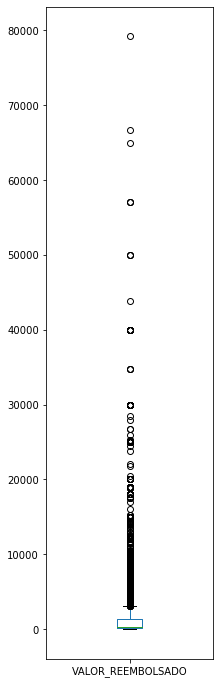

In [8]:
# Boxplot
df_2019.VALOR_REEMBOLSADO.plot(kind="box", figsize=(3,12));

Analisando o *boxplot*, percebemos que, realmente, há *outliers* no atributo `VALOR_REEMBOLSADO`, no entanto, não iremos tratar esses *outliers* pois queremos uma visão mais ampla dos gastos dos Senadores.

### **Gasto por total por mês do Senadores em 2019**

In [9]:
# Gasto total por mês dos Senadores
print("O gasto total por mês dos Senadores foi, em reais:")
display(df_2019.groupby(['MES']).VALOR_REEMBOLSADO.sum())

O gasto total por mês dos Senadores foi, em reais:


MES
1     1598389.68
2     1720293.88
3     1879841.79
4     2036964.21
5     2199153.76
6     2196522.08
7     1882448.80
8     2187491.87
9     2196617.92
10    2500992.24
11    2405018.25
12    2428136.69
Name: VALOR_REEMBOLSADO, dtype: float64

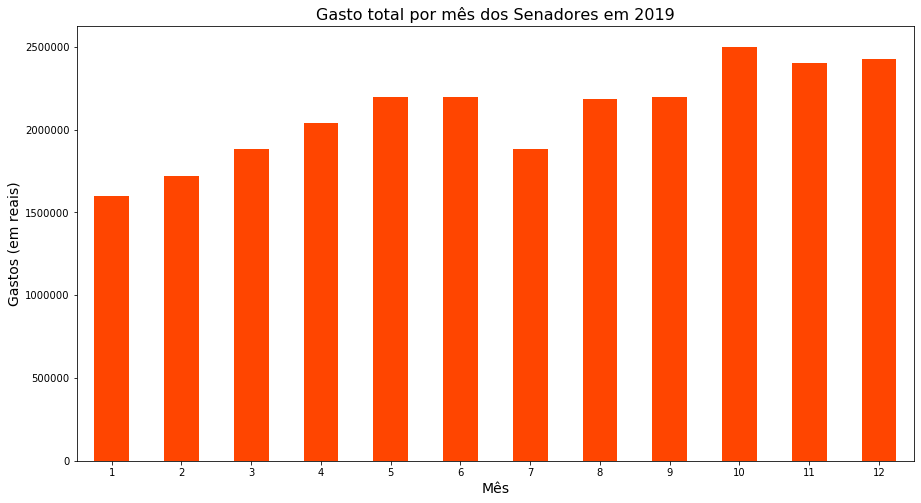

In [10]:
# Visualizando o Gasto total por mês dos Senadores

df_2019.groupby(['MES']).VALOR_REEMBOLSADO.sum().plot(kind="bar", figsize=(15,8), rot=0, color="orangered");
plt.title("Gasto total por mês dos Senadores em 2019", fontsize=16)
plt.xlabel("Mês", fontsize=14);
plt.ylabel("Gastos (em reais)", fontsize=14);

**Gasto total dos Senadores no ano de 2019**

In [11]:
# Gasto total em 2019
print("O gasto total dos Senadores no ano de 2019 foi, em reais:")
print("R$", df_2019.VALOR_REEMBOLSADO.sum())

O gasto total dos Senadores no ano de 2019 foi, em reais:
R$ 25231871.17


**Média dos gastos dos Senadores por mês em 2019**

In [12]:
# Média mensal dos gastos por mês
print("Média dos gastos dos Senadores por mês:")
print("R$", round((df_2019.VALOR_REEMBOLSADO.sum() / df_2019.MES.nunique()) / df_2019.SENADOR.nunique(), 2))

Média dos gastos dos Senadores por mês:
R$ 16556.35


### **Tipos de gastos dos Senadores em 2019**

In [13]:
# Tipos de gastos dos Senadores
df_2019.TIPO_DESPESA.value_counts().sort_values(ascending=False)

Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   8548
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 5790
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           4103
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.     1315
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                              979


Assim, podemos perceber que em 2019, os Senadores utilizaram mais o CEAPS em `Locomoção, hospedagem, alimentação, combustíveis e lubrificantes` com um total de `8548`.

Então, podemos ver o **valor gasto com cada tipo de despesa**:

In [14]:
# Valor com cada tipo de despesa
df_2019.groupby(['TIPO_DESPESA']).VALOR_REEMBOLSADO.sum().sort_values(ascending=False)

TIPO_DESPESA
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 7431270.65
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                             5912962.01
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   4451303.51
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           4179564.03
Divulgação da atividade parlamentar                                                                                                                                

Percebe-se, que em 2019, levando em consideração o valor gasto total por tipo de despesa, os Senadores gastaram em `Passagens aéreas, aquáticas e terrestres nacionais` com um valor total gasto de `R$ 7431270.65` nesse tipo de despesa.

## **Comparativo dos gastos dos Senadores de 2008 a 2019**

Agora, será feito um comparativo do valor total gastos pelos Senadores nos anos de 2008 a 2019.

Antes dessa análise, precisamos fazer um ajuste no conjunto de dados de 2013:

In [15]:
df_2013['VALOR_REEMBOLSADO'] = df_2013['VALOR_REEMBOLSADO'].str.replace(',', '.')

In [16]:
df_2013['VALOR_REEMBOLSADO'] = df_2013['VALOR_REEMBOLSADO'].replace(to_replace='1\r\n675.55', value='1675.55')

In [17]:
df_2013['VALOR_REEMBOLSADO'] = df_2013['VALOR_REEMBOLSADO'].astype(float)

Após os ajustes feito no conjunto de dados `df_2013`, iremos montar um novo *DataFrame* (conjunto de dados) para então fazer o comparativo dos gastos dos Senadores por ano.

In [18]:
# Ajustando um novo DataFrame para os dados
d = {'ano': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 'valor_total': [df_2008.VALOR_REEMBOLSADO.sum(), df_2009.VALOR_REEMBOLSADO.sum(), 
                                                                                                          df_2010.VALOR_REEMBOLSADO.sum(), df_2011.VALOR_REEMBOLSADO.sum(), 
                                                                                                         df_2012.VALOR_REEMBOLSADO.sum(), df_2013.VALOR_REEMBOLSADO.sum(), 
                                                                                                         df_2014.VALOR_REEMBOLSADO.sum(), df_2015.VALOR_REEMBOLSADO.sum(), 
                                                                                                         df_2016.VALOR_REEMBOLSADO.sum(), df_2017.VALOR_REEMBOLSADO.sum(),
                                                                                                         df_2018.VALOR_REEMBOLSADO.sum(), df_2019.VALOR_REEMBOLSADO.sum()]}

df_tot = pd.DataFrame(data=d)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(df_tot)

,ano,valor_total
0,2008,11575947.40
1,2009,11731886.26
2,2010,10760010.57
3,2011,19004502.48
4,2012,23354742.37
5,2013,24658952.86
6,2014,22519394.12
7,2015,24859318.61
8,2016,25301959.82
9,2017,26672840.26


**Visualização dos gastos dos Senadores de 2008 a 2019**

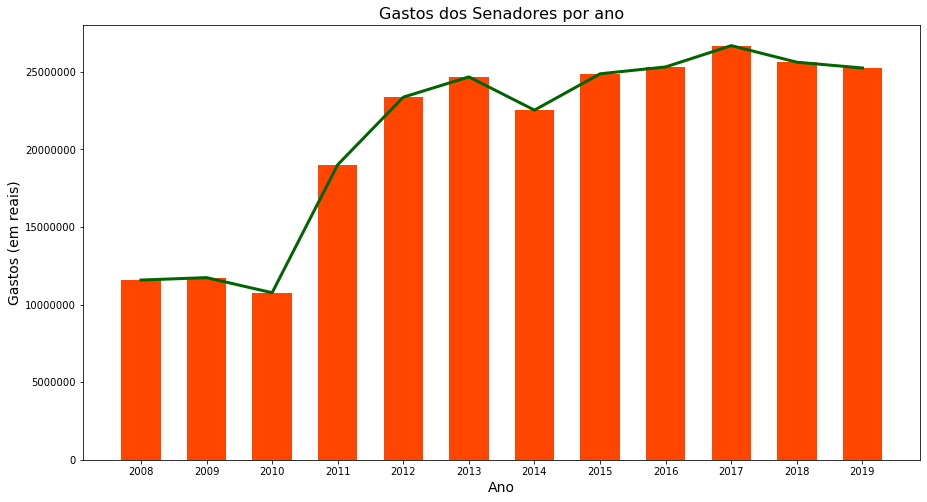

In [20]:
# Plotando os gastos de 2008 a 2019
plt.figure(figsize=(15,8))

ax = plt.gca()
ax.bar(df_tot.ano, df_tot.valor_total, color="orangered", width=0.6);
ax.plot(df_tot.ano, df_tot.valor_total, color="darkgreen", linewidth=3);

plt.title("Gastos dos Senadores por ano", fontsize=16);
plt.xlabel("Ano", fontsize=14);
plt.ylabel("Gastos (em reais)", fontsize=14);
plt.xticks(df_tot.ano);
plt.ticklabel_format(style='plain', axis='y');

Visualizando o gráfico de barras percebe-se que de 2010 para 2011 os gastos dos Senadores, praticamente, dobraram e partir de 2014 os gastos ficaram, relativamente, estáveis.

## **Considerações finais**

- Em 2019, os Senadores tiveram um **gasto total de R$ 25231871.17** utilizando as Cotas para Exercício da Atividade Parlamentar dos Senadores (CEAPS).
- Em 2019, percebe-se os maiores gastos dos Senadores foram Outubro, Novembro e Dezembro, atingindo o seu pico em **Outubro** com **2500992.24 reais**.
- A **média mensal** que cada **Senador gastou** por mês foi de **16556.35 reais**.
- De 2010 para 2011 os gastos dos Senadores praticamente dobraram, tendo um **aumento** de mais de **76%**.
- O tipo de despesa em que os Senadores mais gastam é `Passagens aéreas, aquáticas e terrestres nacionais`, no entanto a que mais utilizam é para `Locomoção, hospedagem, alimentação, combustíveis e lubrificantes`.

## ***Reflexão***
> Será que é, realmente, importante que os Senadores tenham todos esses gastos, sendo que esse dinheiro vem dos impostos que pagamos e poderiam ser investidos em coisas que, de fato, iriam auxiliar nós, a população?